In [23]:
from matplotlib import pyplot as plt
from utils.utils import *
import utils.promethee_functions as pf
import utils.clustering_functions as cf

In [24]:
data = read_data()

K = data.columns.shape[0] # Nb of criteria
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series
N = data.shape[0] # Nb of alternatives

W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
Q = [4, 0.3, 40,  0.4, 4, 2] # Indifference thresholds
P = [28, 0.9, 80, 1, 20, 12] # Preference thresholds

Reading HDI dataset
co2prod: min=0.0, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=85.473
gdi: min=0.383, max=1.041
eys: min=3.5751, max=23.2477
mys: min=1.4606, max=14.2559


In [25]:
phi_c_all = pf.get_all_Phi_c(data, P, Q) # compute all mono criterion flows series
PHI = pf.PHI_all(phi_c_all, W, N, L, K) # Aggregate to the net flow series

c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


In [26]:
# Transform PHI into a dataframe with ISO3 as index and years as columns
PHI_df = pd.DataFrame(PHI, index=data.index, columns=np.arange(1990, 2023))

In [27]:
def plot_PHI(PHI, alt_names, labels=True):
    """
    Plot the net flow series for all alternatives
    """
    fig, ax = plt.subplots()
    # size
    fig.set_size_inches(10, 5)
    for i in range(PHI.shape[0]):
        ax.plot(PHI.iloc[i], label=alt_names[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Net flow")
    ax.set_title("PHI scores for all alternatives")
    if labels:
        ax.legend()
    plt.show()

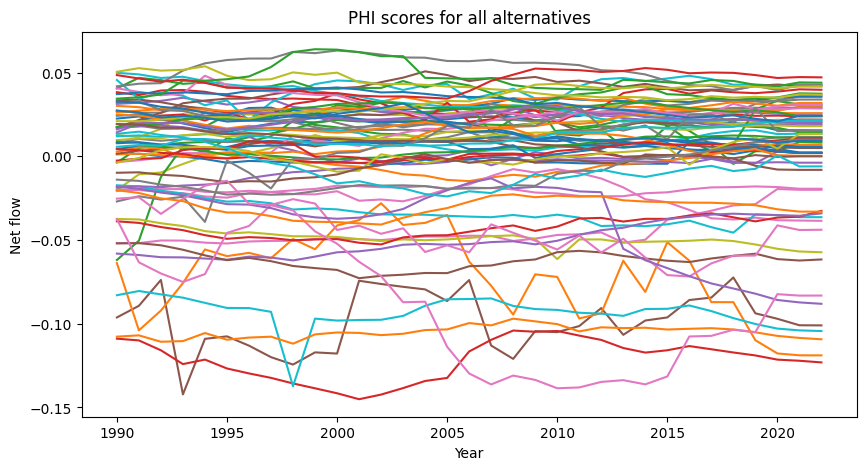

In [28]:
plot_PHI(PHI_df, PHI_df.index, False)

In [29]:
k = 5
results = cf.kMeans(PHI_df, k, max_it=100, distance_function=cf.euclid_distance)

# Print the results
for i in range(k):
    print(f"Cluster {i}: {results[i].index}")


100%|██████████| 100/100 [00:02<00:00, 37.42it/s]

Cluster 0: Index(['ALB', 'ARG', 'AUS', 'AUT', 'BHS', 'BRB', 'BEL', 'BGR', 'CHL', 'CYP',
       'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HKG', 'HUN', 'ISL', 'IRL',
       'ISR', 'ITA', 'JPN', 'KOR', 'MLT', 'NLD', 'NZL', 'NOR', 'PHL', 'POL',
       'ROU', 'LKA', 'SWE', 'CHE', 'GBR', 'URY'],
      dtype='object', name='iso3')
Cluster 1: Index(['BHR', 'BDI', 'PAK', 'SDN'], dtype='object', name='iso3')
Cluster 2: Index(['BGD', 'BRN', 'HTI', 'HND', 'IND', 'MAR', 'NPL', 'SAU', 'SYR', 'ZMB'], dtype='object', name='iso3')
Cluster 3: Index(['TTO'], dtype='object', name='iso3')
Cluster 4: Index(['BOL', 'BWA', 'CAN', 'CHN', 'CZE', 'DOM', 'EGY', 'GHA', 'IDN', 'IRN',
       'MUS', 'MEX', 'PRY', 'PRT', 'LCA', 'SGP', 'ZAF', 'ESP', 'THA', 'TUR',
       'USA'],
      dtype='object', name='iso3')


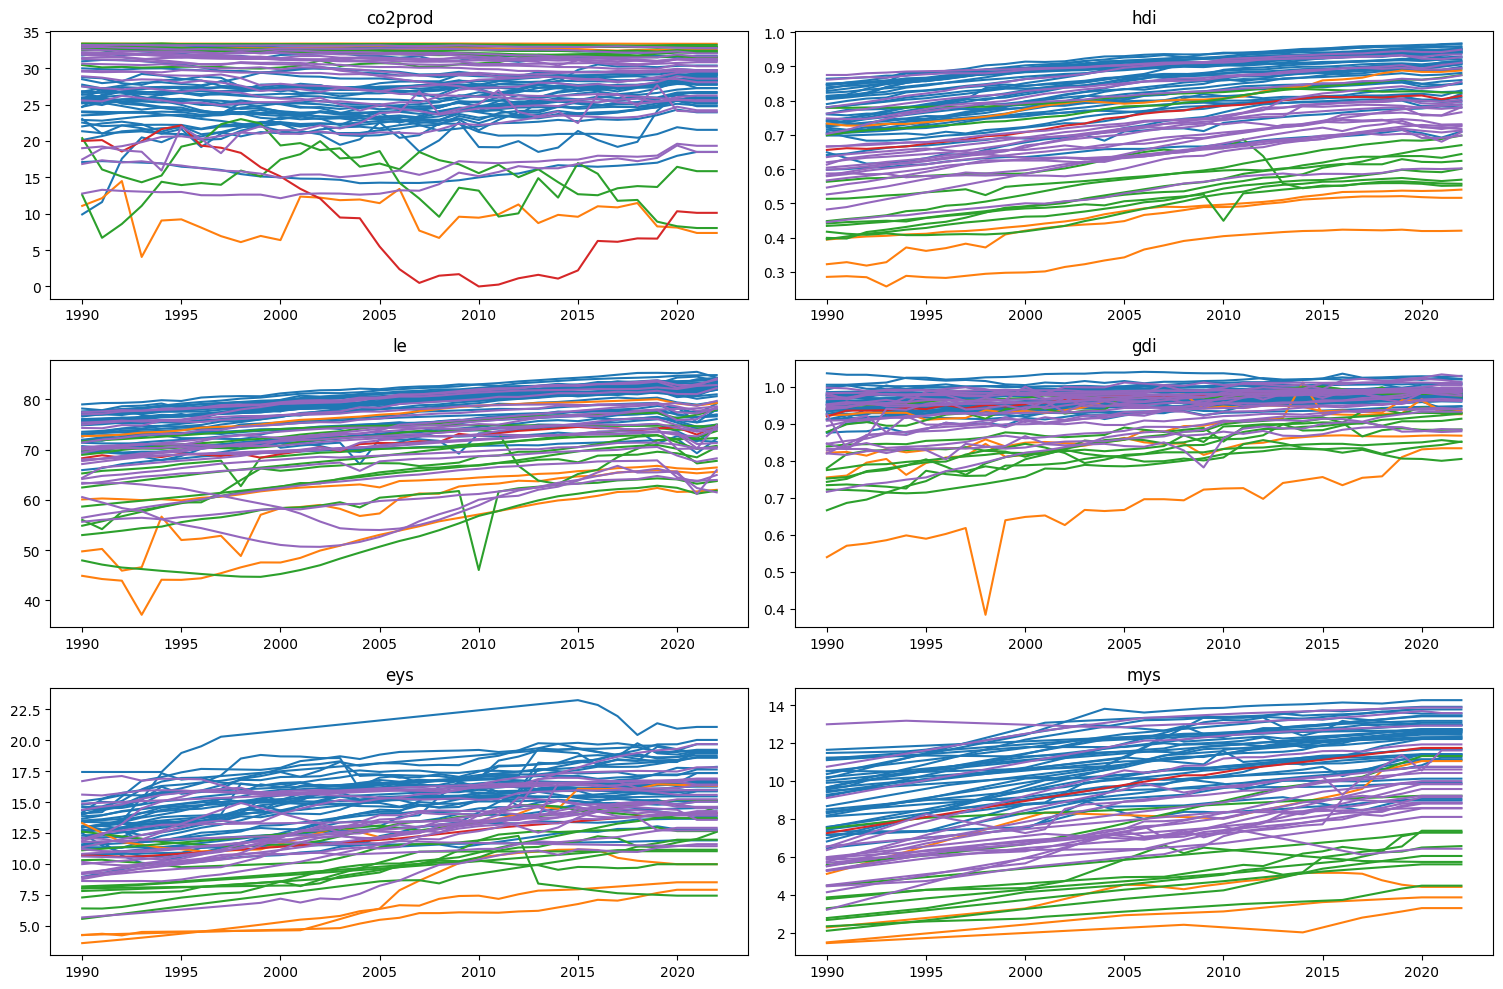

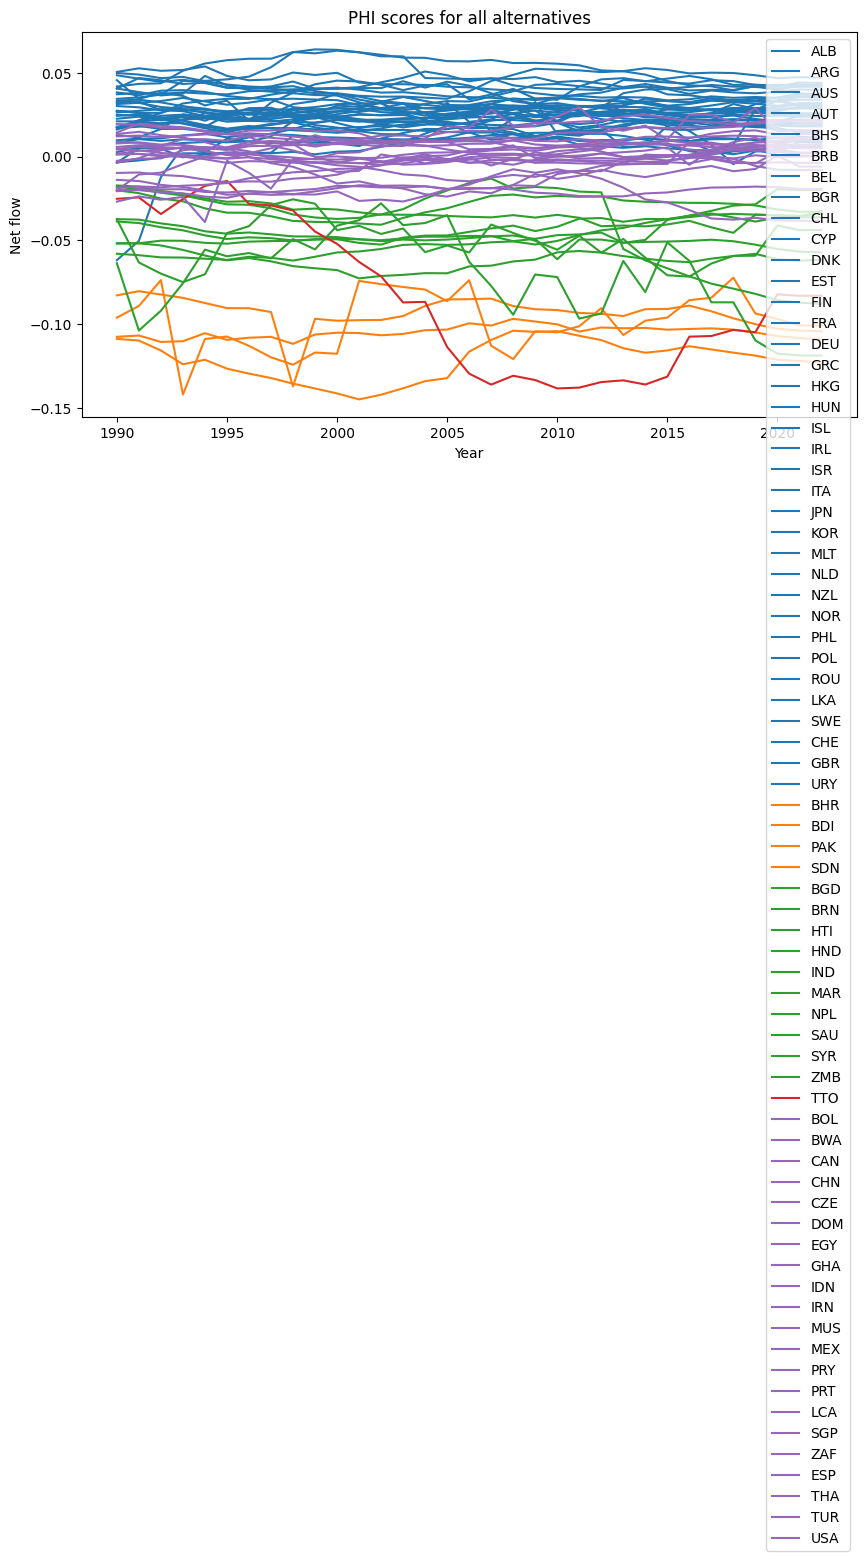

In [32]:
groups = []
for i in range(k):
    groups.append(results[i].index)

plot_cluster(groups, data, False)

plot_cluster_phi(PHI_df, groups)

## Test with smaller dataset

In [ ]:
data = read_data()

Reading HDI dataset
co2prod: min=0.0, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=85.473
gdi: min=0.383, max=1.041
eys: min=3.5751, max=23.2477
mys: min=1.4606, max=14.2559


In [18]:
group0 = ["PAK", "SDN", "BDI", "HTI"]
group1 = ["EST", "CZE", "MLT", "SGP", "IRL"]
group2 = ["CHE", "ISL", "NZL", "SWE"]

all_groups = group0 + group1 + group2

data = data.loc[all_groups]

# Replace the names of the countries: grp_number_ISO3
data.index = ["0_" + i for i in group0] + ["1_" + i for i in group1] + ["2_" + i for i in group2]

get_min_max_criteria(data, False)

co2prod: min=9.9, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=84.255
gdi: min=0.383, max=1.041
eys: min=3.5751, max=19.7613
mys: min=1.4606, max=13.9041


In [19]:
# Nb of criteria
K = data.columns.shape[0] # Nb of criteria
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series
N = data.shape[0] # Nb of alternatives

W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
Q = [10, 0.3, 40,  0.4, 4, 2] # Indifference thresholds
P = [28, 0.9, 80, 1, 18, 12] # Preference thresholds

phi_c_all = pf.get_all_Phi_c(data, P, Q) # compute all mono criterion flows series


c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


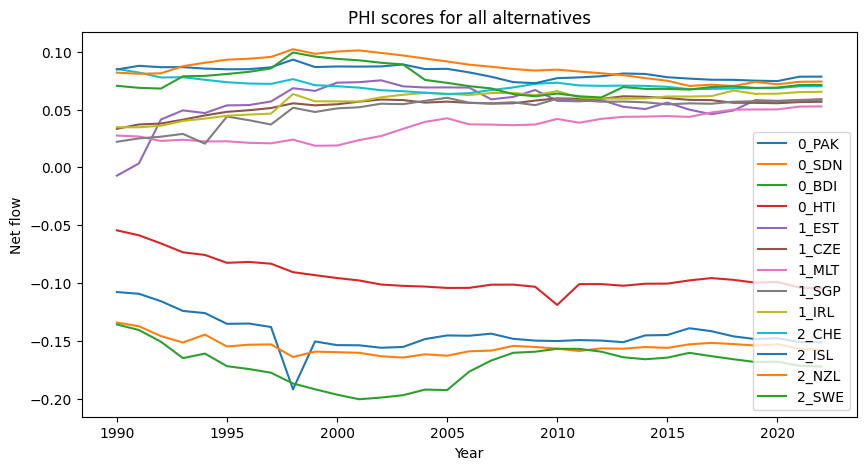

100%|██████████| 100/100 [00:00<00:00, 233.71it/s]


Cluster 0: Index(['0_PAK', '0_SDN', '0_BDI', '0_HTI'], dtype='object')
Cluster 1: Index(['2_CHE', '2_ISL', '2_NZL', '2_SWE'], dtype='object')
Cluster 2: Index(['1_EST', '1_CZE', '1_MLT', '1_SGP', '1_IRL'], dtype='object')


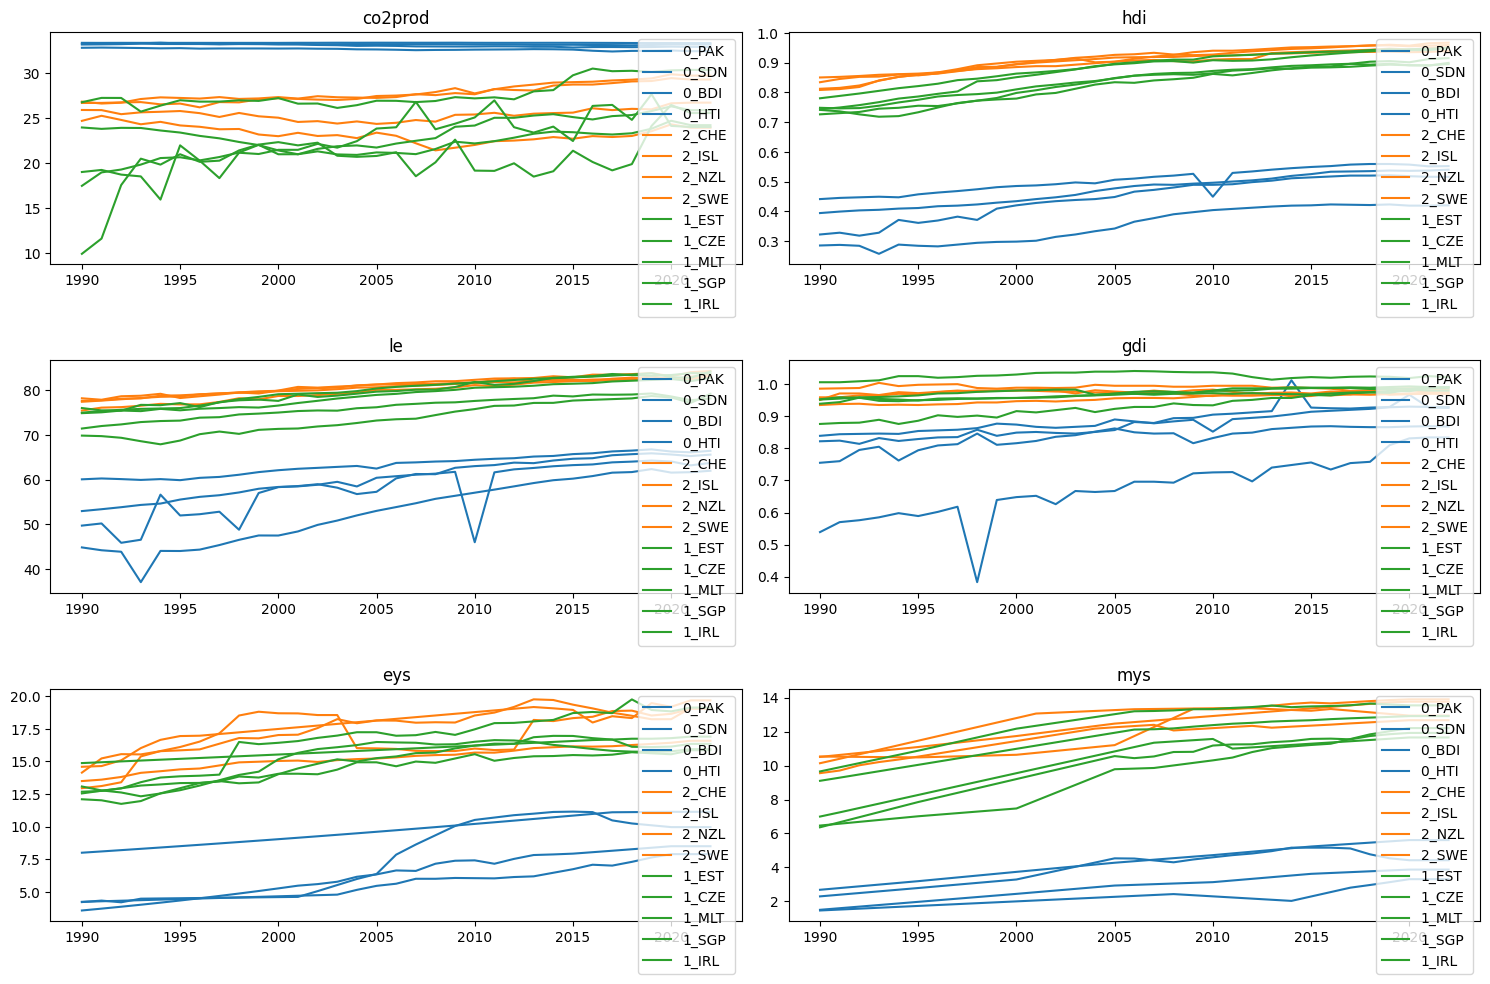

In [ ]:
PHI = pf.PHI_all(phi_c_all, W, N, L, K) # Aggregate to the net flow series

# Transform PHI into a dataframe with ISO3 as index and years as columns
PHI_df = pd.DataFrame(PHI, index=data.index, columns=np.arange(1990, 2023))

plot_PHI(PHI_df, PHI_df.index, True)

k = 3
results = cf.kMeans(PHI_df, k, max_it=100, distance_function=cf.euclid_distance)

# Print the results
for i in range(k):
    print(f"Cluster {i}: {results[i].index}")

groups = []
for i in range(k):
    groups.append(results[i].index)

plot_cluster(groups, data, True)

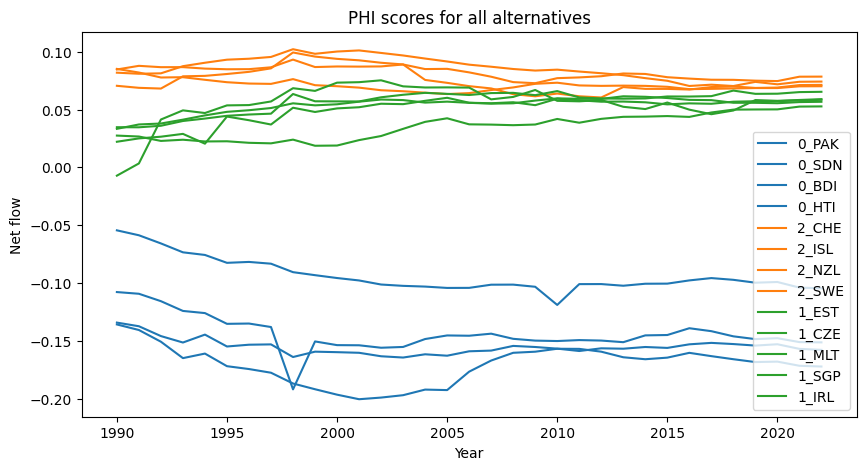

In [ ]:
plot_cluster_phi(PHI_df, groups)